In [17]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from matplotlib.gridspec import GridSpec

#Read data file
df = pd.read_csv(r'C:\Users\Cj Naylor\Downloads\archive\ai_job_market_insights.csv') 

#Check data info
print(df.isnull().sum())
print(df.info)
print(df.dtypes)
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

# Get summary statistics
print(df.info)
df.shape


Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64
<bound method DataFrame.info of                  Job_Title            Industry Company_Size   Location  \
0    Cybersecurity Analyst       Entertainment        Small      Dubai   
1     Marketing Specialist          Technology        Large  Singapore   
2            AI Researcher          Technology        Large  Singapore   
3            Sales Manager              Retail        Small     Berlin   
4    Cybersecurity Analyst       Entertainment        Small      Tokyo   
..                     ...                 ...          ...        ...   
495         Data Scientist  Telecommunications       Medium     Berlin   
496  Cybersecurity Analyst  Telecommunications        Small     London   
497  Cybersecurity 

(500, 10)

In [39]:
df.dtypes

Job_Title                 object
Industry                  object
Company_Size              object
Location                  object
AI_Adoption_Level         object
Automation_Risk           object
Required_Skills           object
Salary_USD               float64
Remote_Friendly           object
Job_Growth_Projection     object
dtype: object

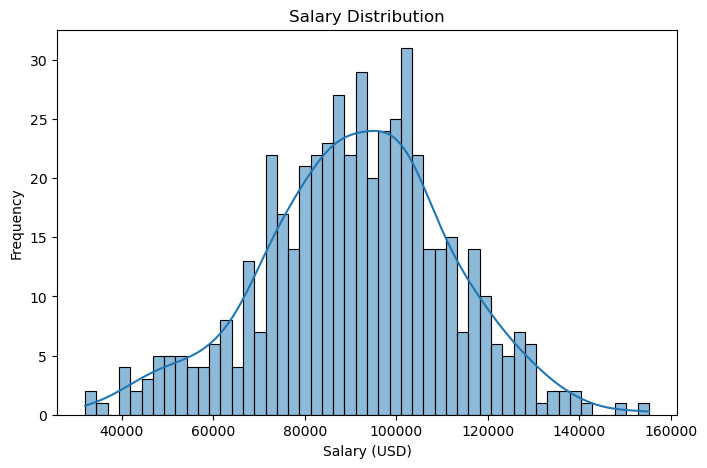

In [51]:

#Salary distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Salary_USD'], bins=50, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

In [42]:
print("Null value count:")
print(df.isnull().sum())
print("\nShape:")
print(df.shape)
print("\nData types:")
df.dtypes

Null value count:
Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64

Shape:
(500, 10)

Data types:


Job_Title                 object
Industry                  object
Company_Size              object
Location                  object
AI_Adoption_Level         object
Automation_Risk           object
Required_Skills           object
Salary_USD               float64
Remote_Friendly           object
Job_Growth_Projection     object
dtype: object

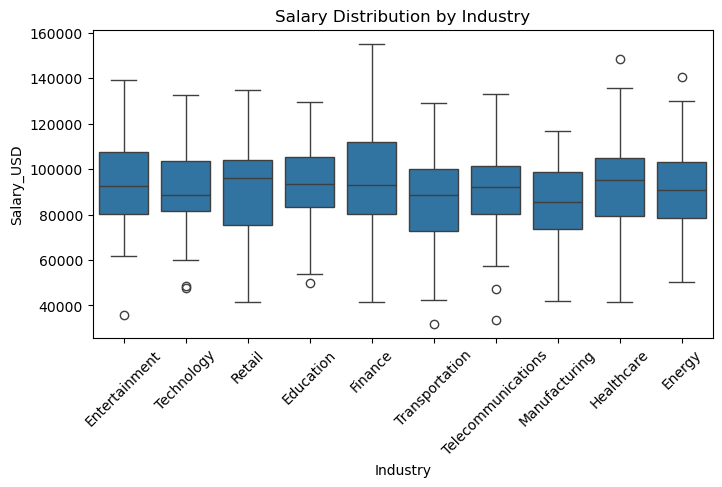

In [79]:
# # Salary by Industry
plt.figure(figsize=(8, 4))
sns.boxplot(x='Industry', y='Salary_USD', data=df)
plt.xticks(rotation=45)
plt.title('Salary Distribution by Industry')
plt.show()

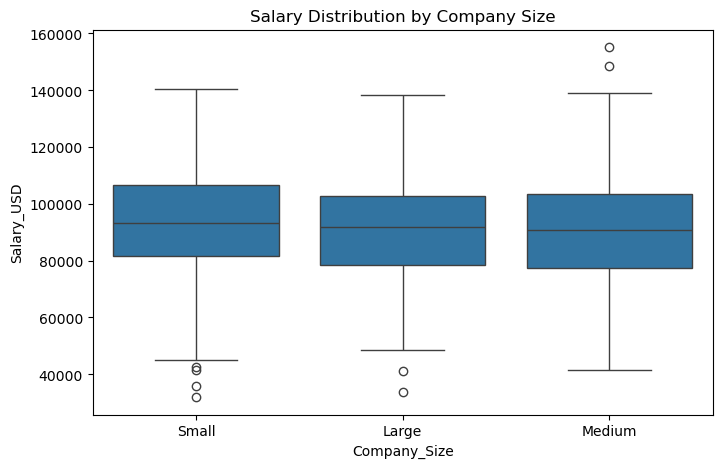

In [55]:
# Salary by Company Size
plt.figure(figsize=(8, 5))
sns.boxplot(x='Company_Size', y='Salary_USD', data=df)
plt.title('Salary Distribution by Company Size')
plt.show()

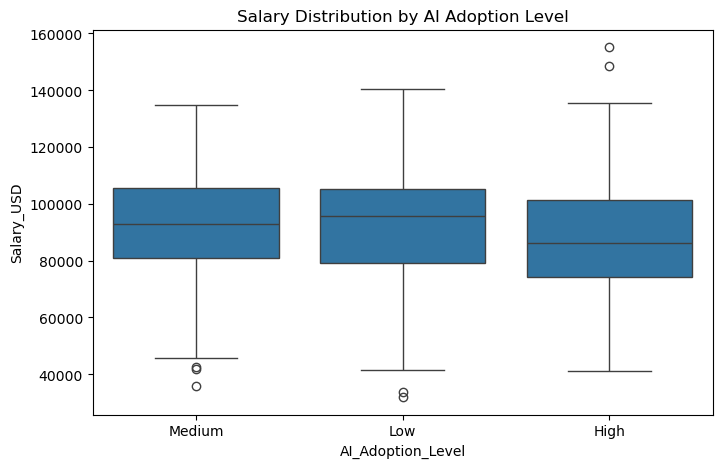

In [56]:
# Salary by AI Adoption Level
plt.figure(figsize=(8, 5))
sns.boxplot(x='AI_Adoption_Level', y='Salary_USD', data=df)
plt.title('Salary Distribution by AI Adoption Level')
plt.show()

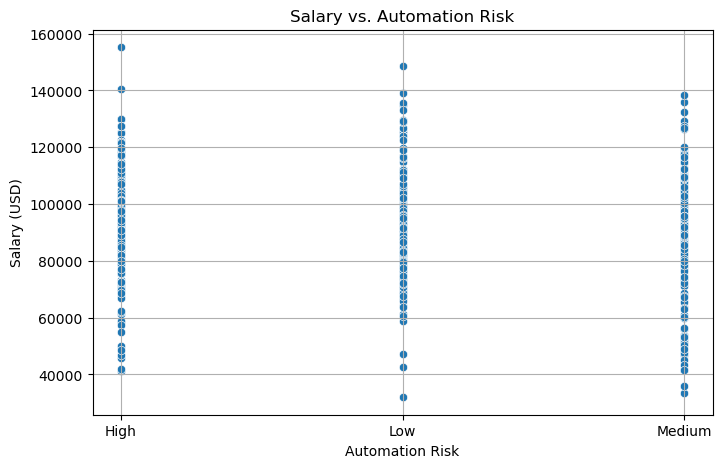

In [60]:
# Scatter plot for Salary vs. Automation Risk
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Automation_Risk', y='Salary_USD')
plt.title('Salary vs. Automation Risk')
plt.xlabel('Automation Risk')
plt.ylabel('Salary (USD)')
plt.grid(True)
plt.show()

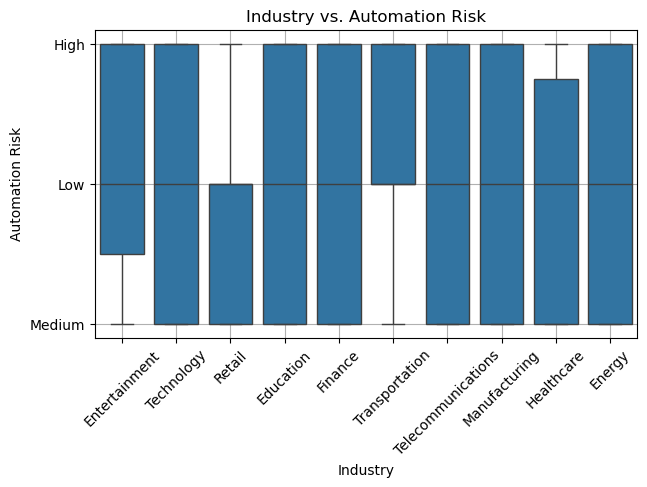

In [67]:
# Box plot for Industry vs. Automation Risk
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='Industry', y='Automation_Risk')
plt.title('Industry vs. Automation Risk')
plt.xlabel('Industry')
plt.ylabel('Automation Risk')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


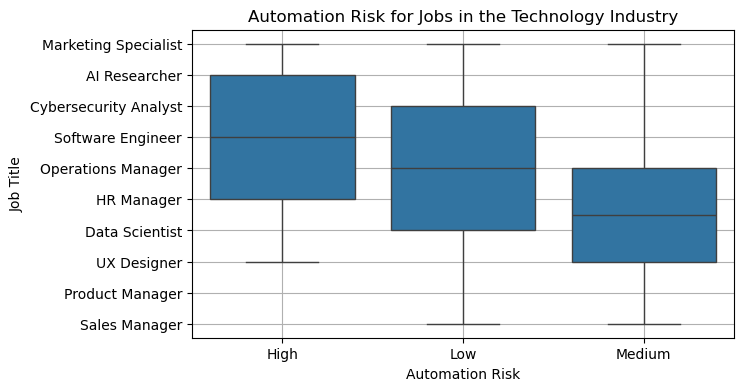

In [65]:
tech_jobs = df[df['Industry'] == 'Technology']
# Box plot for Automation Risk in Technology industry
plt.figure(figsize=(7, 4))
sns.boxplot(data=tech_jobs, x='Automation_Risk', y='Job_Title')
plt.title('Automation Risk for Jobs in the Technology Industry')
plt.xlabel('Automation Risk')
plt.ylabel('Job Title')
plt.grid(True)
plt.show()


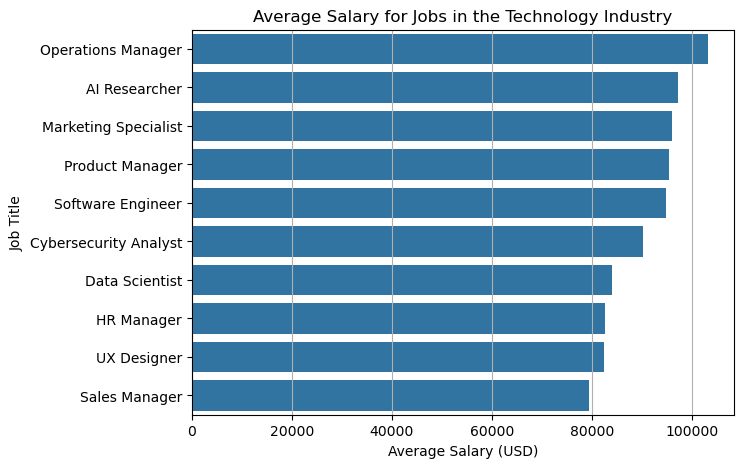

In [94]:
# Calculate average salary for each job title in Technology industry
avg_salary_tech = tech_jobs.groupby('Job_Title')['Salary_USD'].mean().reset_index()
avg_salary_tech.sort_values(by='Salary_USD', ascending=False, inplace=True)

# Bar plot for average salary in Technology industry
plt.figure(figsize=(7, 5))
sns.barplot(data=avg_salary_tech, x='Salary_USD', y='Job_Title')
plt.title('Average Salary for Jobs in the Technology Industry')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.grid(axis='x')
plt.show()


0


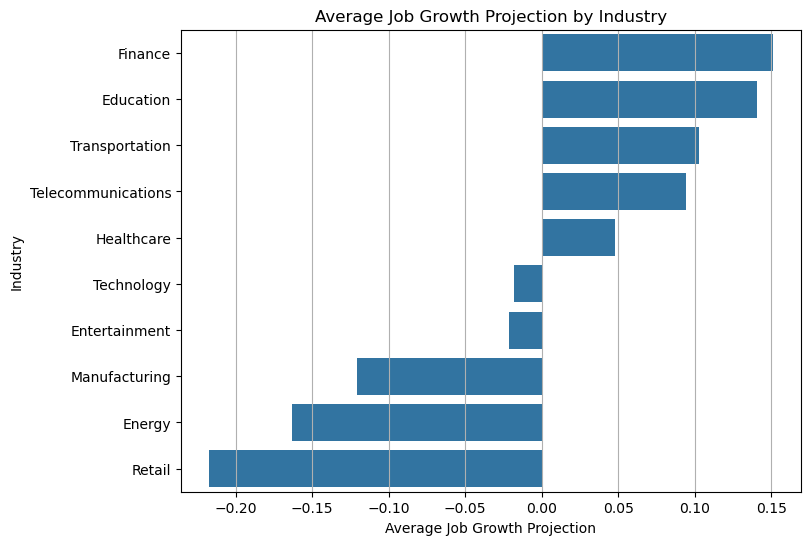

In [96]:
# Create a mapping for conversion
growth_mapping = {
    'Decline': -1,
    'Stable': 0,
    'Growth': 1
}

# Map the values and create a new numeric column
df['Job_Growth_Numeric'] = df['Job_Growth_Projection'].map(growth_mapping)

# Calculate average job growth projection by industry
avg_growth_by_industry = df.groupby('Industry')['Job_Growth_Numeric'].mean().reset_index()
avg_growth_by_industry.sort_values(by='Job_Growth_Numeric', ascending=False, inplace=True)

# Bar plot for average job growth projection by industry
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_growth_by_industry, x='Job_Growth_Numeric', y='Industry')
plt.title('Average Job Growth Projection by Industry')
plt.xlabel('Average Job Growth Projection')
plt.ylabel('Industry')
plt.grid(axis='x')
plt.show()


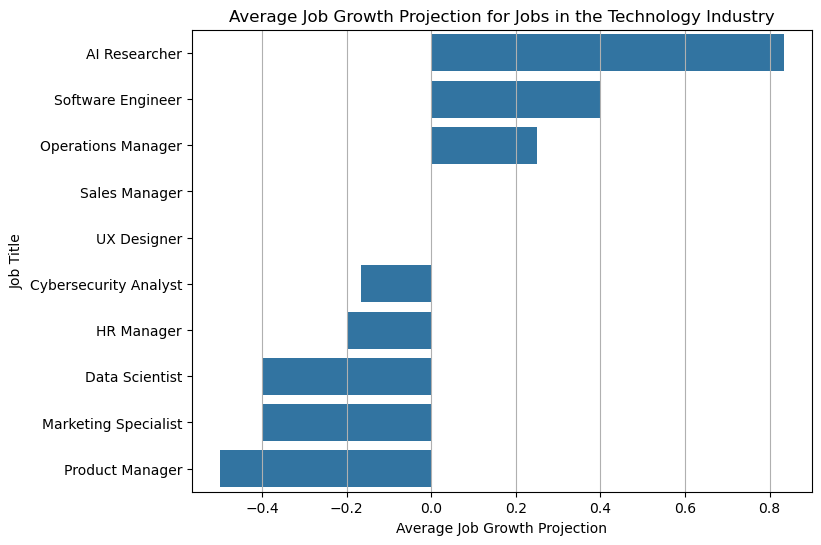

In [100]:
# Filter the DataFrame for Technology industry jobs
tech_jobs = df[df['Industry'] == 'Technology']

# Calculate average job growth projection for each job title 
avg_growth_tech = tech_jobs.groupby('Job_Title')['Job_Growth_Numeric'].mean().reset_index()
avg_growth_tech.sort_values(by='Job_Growth_Numeric', ascending=False, inplace=True)

# Bar plot for average job growth projection for Technology jobs
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_growth_tech, x='Job_Growth_Numeric', y='Job_Title')
plt.title('Average Job Growth Projection for Jobs in the Technology Industry')
plt.xlabel('Average Job Growth Projection')
plt.ylabel('Job Title')
plt.grid(axis='x')
plt.show()


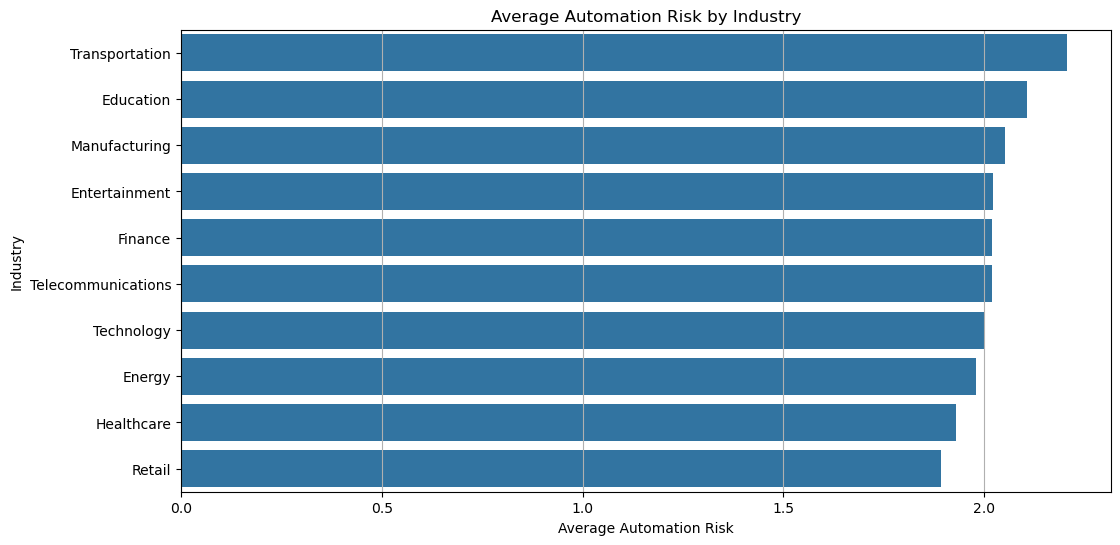

In [99]:
# Convert strings to numerical for barplot
risk_mapping = {
    'Low': 1,
    'Medium': 2,
    'High': 3
}

# Map the values and create a new numeric column
df['Automation_Risk_Numeric'] = df['Automation_Risk'].map(risk_mapping)

# Calculate average automation risk by industry
avg_automation_risk = df.groupby('Industry')['Automation_Risk_Numeric'].mean().reset_index()

# Sort values for better visualization
avg_automation_risk.sort_values(by='Automation_Risk_Numeric', ascending=False, inplace=True)

# Bar plot for average automation risk by industry
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_automation_risk, x='Automation_Risk_Numeric', y='Industry')
plt.title('Average Automation Risk by Industry')
plt.xlabel('Average Automation Risk')
plt.ylabel('Industry')
plt.grid(axis='x')
plt.show()


C:\Users\Cj Naylor\AppData\Local\Temp\ipykernel_38228\3685042442.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_automation_risk_tech, x='Automation_Risk_Numeric', y='Job_Title', palette='Blues')


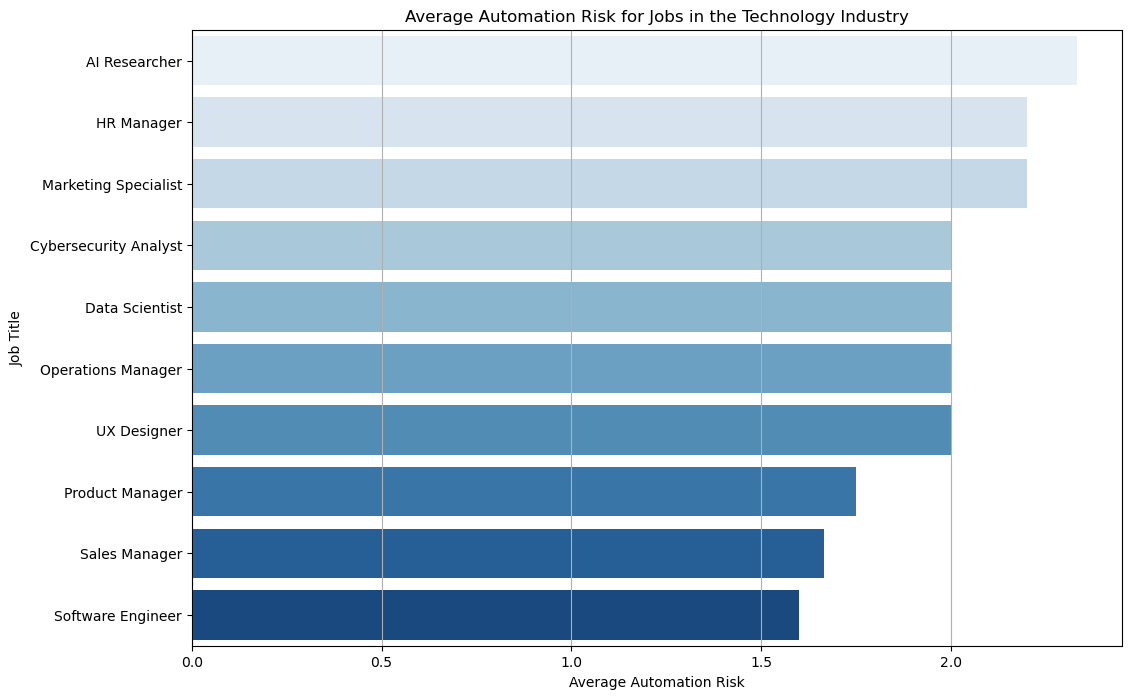

In [89]:
# Filter the DataFrame for Technology industry jobs
tech_jobs = df[df['Industry'] == 'Technology']

# Calculate average automation risk by job title in the Technology industry
avg_automation_risk_tech = tech_jobs.groupby('Job_Title')['Automation_Risk_Numeric'].mean().reset_index()

# Sort values for better visualization
avg_automation_risk_tech.sort_values(by='Automation_Risk_Numeric', ascending=False, inplace=True)

# Bar plot for average automation risk for Technology jobs
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_automation_risk_tech, x='Automation_Risk_Numeric', y='Job_Title', palette='Blues')
plt.title('Average Automation Risk for Jobs in the Technology Industry')
plt.xlabel('Average Automation Risk')
plt.ylabel('Job Title')
plt.grid(axis='x')
plt.show()
